# Objective

* go through processing routine
* Do we have the relvant calibration files
    * What instruments are involved?
    * 1625 filterfunction for relevant instruments?

# Strategy

Convert to netcdf
* This should be hardcoded into the SURFRAD package
* copy the code from sail splash part


Apply Lab calibration
* Not sure if there is much sense in doing a lamp calibration. Below is another example of how that does not work --> Langley or transfer from other langely calibrated instrument.
* ~~There seems to be an error in the caluculation of the direct horizontal and normal in those products for splash (not shown in the publicated data).~~
* This part should actually be somewhat hard coded in a script somewhere in SURFRAD package!
* Set it up so it prcesses all new data that is comming in
* imitate what has been done in /home/grad/htelg/projects/ASR/splash/apply_calibrations/calibrate_v0.2.ipynb
* We will need MFRSR only
* use most recent Charls calibrations

Based on the files created above come up with a code to get AOD based on Lab cals
* choose single number for top fo the atmosphere spectral irradiance
* how is the earth-sun distance implemented now, deviation from mean?


# Convert to Netcdf

* make what is done for sail operational for SURFRAD
* merge into SURFRAD
* run for PMOD on cronjob

Make in separate notebook

# Langley calibration

In [21]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspir

In [12]:
version = '0.1'
serialno = 648
p2fld = pl.Path(f'/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.cal/v{version}/')

In [13]:
p2flist = list(p2fld.glob('*'))
p2flist.sort()

In [14]:
p2flist

[PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250924.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250925.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250926.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250927.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250929.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250930.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251001.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251002.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251003.nc')]

## 648

### 202510

In [ ]:
%matplotlib inline

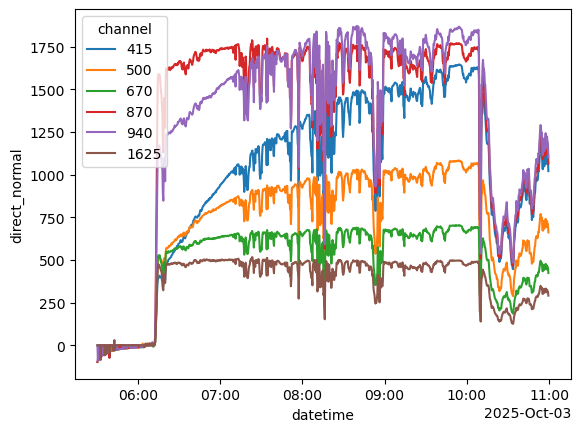

In [ ]:
ds = xr.open_mfdataset('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251003.nc')
ds.attrs['site_longitude'] += 360 

ds.direct_normal.plot.line(x = 'datetime')

In [ ]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [ ]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [ ]:
# %matplotlib widget

In [ ]:
lang = sir.langley_am
lc = lang.clean(threshold=2)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: 0.0568	 skewscale:2.2273
skewness: 0.1564	 skewscale:2.6254


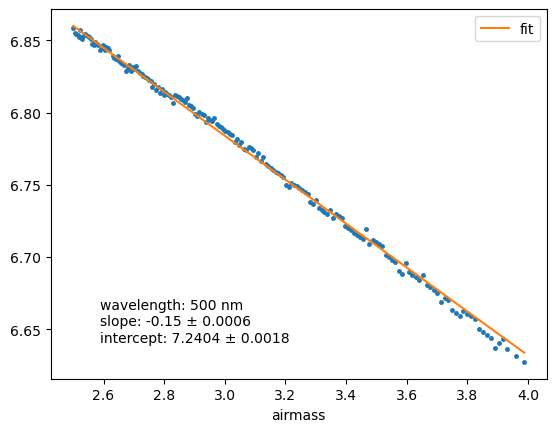

In [ ]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [ ]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: -0.1518	 skewscale:4.3660
skewness: -0.0796	 skewscale:3.7166


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

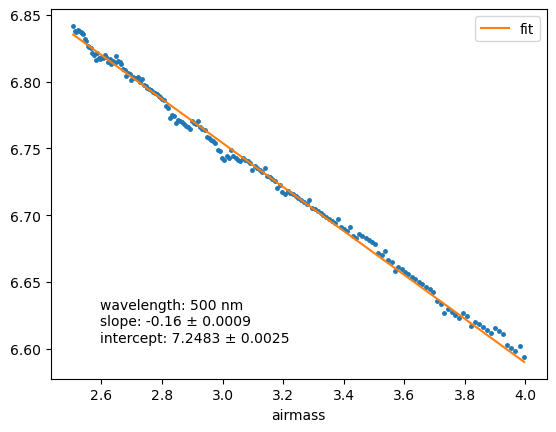

In [ ]:
langc.plot(wavelength=500,show_pre_clean=False)

### 20251002

In [ ]:
%matplotlib inline

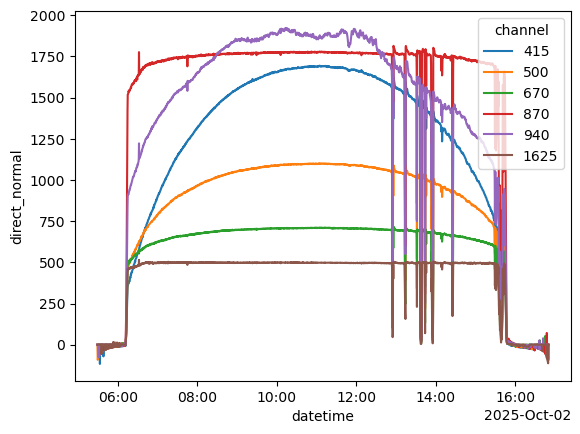

In [364]:
ds = xr.open_mfdataset('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251002.nc')
ds.attrs['site_longitude'] += 360 

ds.direct_normal.plot.line(x = 'datetime')

In [365]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [366]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [367]:
# %matplotlib widget

In [368]:
lang = sir.langley_am
lc = lang.clean(threshold=2)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: 0.0568	 skewscale:2.2273
skewness: 0.1564	 skewscale:2.6254


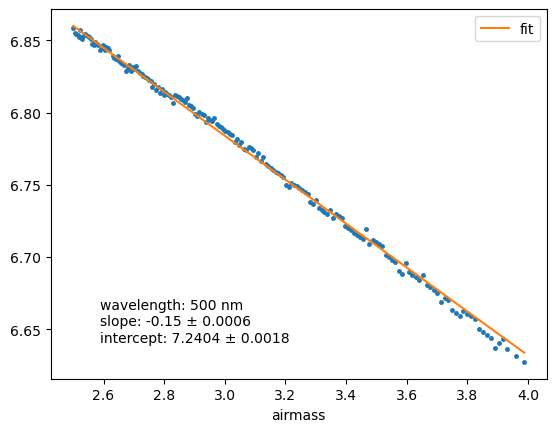

In [369]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [370]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: -0.1518	 skewscale:4.3660
skewness: -0.0796	 skewscale:3.7166


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

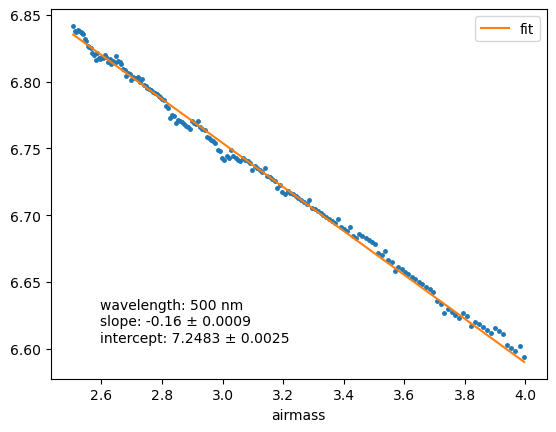

In [371]:
langc.plot(wavelength=500,show_pre_clean=False)

### 20250929

In [323]:
%matplotlib inline

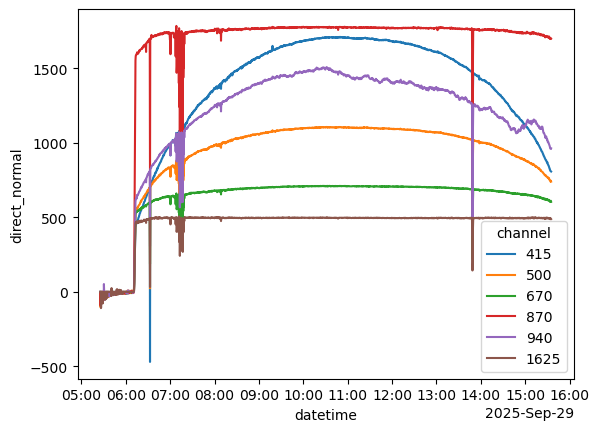

In [353]:
ds = xr.open_mfdataset('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250929.nc')
ds.attrs['site_longitude'] += 360 

ds.direct_normal.plot.line(x = 'datetime')

In [354]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [355]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [356]:
# %matplotlib widget

In [357]:
lang = sir.langley_am
lc = lang.clean(threshold=2)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: -0.1476	 skewscale:2.5904
skewness: -0.1520	 skewscale:2.6078
skewness: -0.1266	 skewscale:2.5065
skewness: -0.0794	 skewscale:2.3175
skewness: -0.0148	 skewscale:2.0592
skewness: -0.0186	 skewscale:2.0744
skewness: -0.0103	 skewscale:2.0413
skewness: 0.0290	 skewscale:2.1159
skewness: 0.0708	 skewscale:2.2833
skewness: 0.0950	 skewscale:2.3800


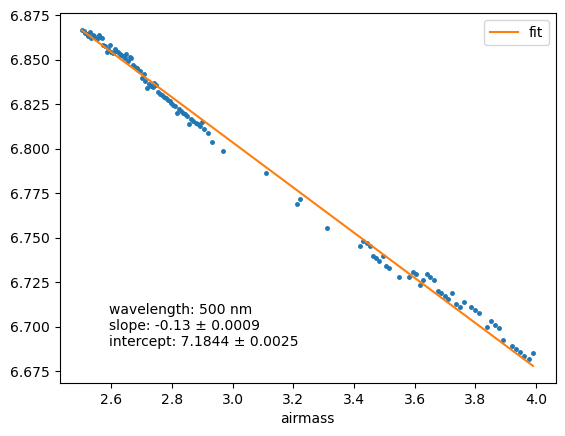

In [358]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [359]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: -0.0761	 skewscale:3.6850


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

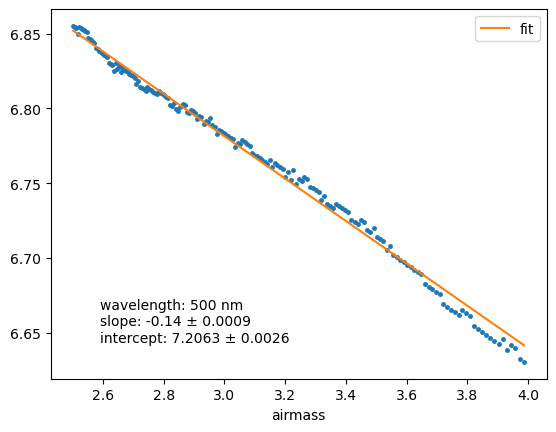

In [360]:
langc.plot(wavelength=500,show_pre_clean=False)

### 20250928

In [343]:
ds = xr.open_mfdataset('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc')
ds.attrs['site_longitude'] += 360 


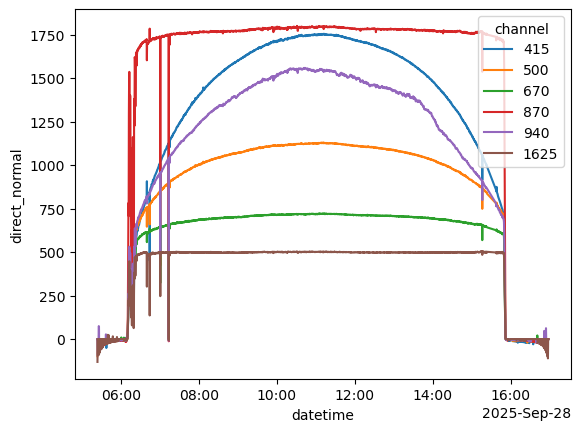

In [344]:
ds.direct_normal.plot.line(x = 'datetime')

In [345]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [346]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [347]:
lang = sir.langley_am
lc = lang.clean(threshold=3)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: -0.1003	 skewscale:3.9028
skewness: -0.0621	 skewscale:3.5587
skewness: -0.0307	 skewscale:3.2759
skewness: -0.0180	 skewscale:3.1622


In [ ]:
# %matplotlib inline

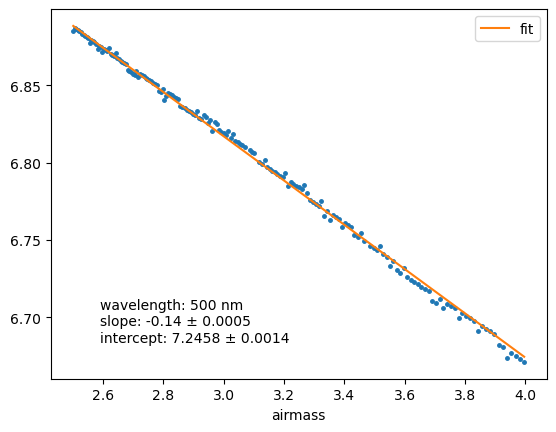

In [352]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [311]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: -0.0371	 skewscale:3.3342
skewness: 0.0412	 skewscale:3.3706


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

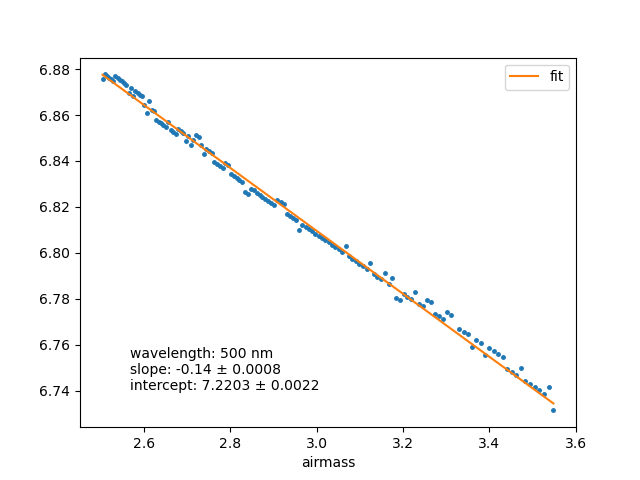

In [312]:
langc.plot(wavelength=500,show_pre_clean=False)

# AOD

In [4]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspec

In [5]:
fn = '/nfs/grad/campaigns/splash/data_products/spectral_irradiances_downwelling/cbc/cal.2021/v0.2/cbc_specflux_20230528.nc'
dssf = xr.open_dataset(fn)
fn = '/nfs/grad/campaigns/splash/data_products/spectral_surface_albedo/v1.0/cbc/cbc.spectral_surface_albedo.20230528.nc'
dsal = xr.open_dataset(fn)

In [6]:
atmspec.CombinedGlobalDiffuseDirect

atmPy.radiation.retrievals.spectral_irradiance.CombinedGlobalDiffuseDirect

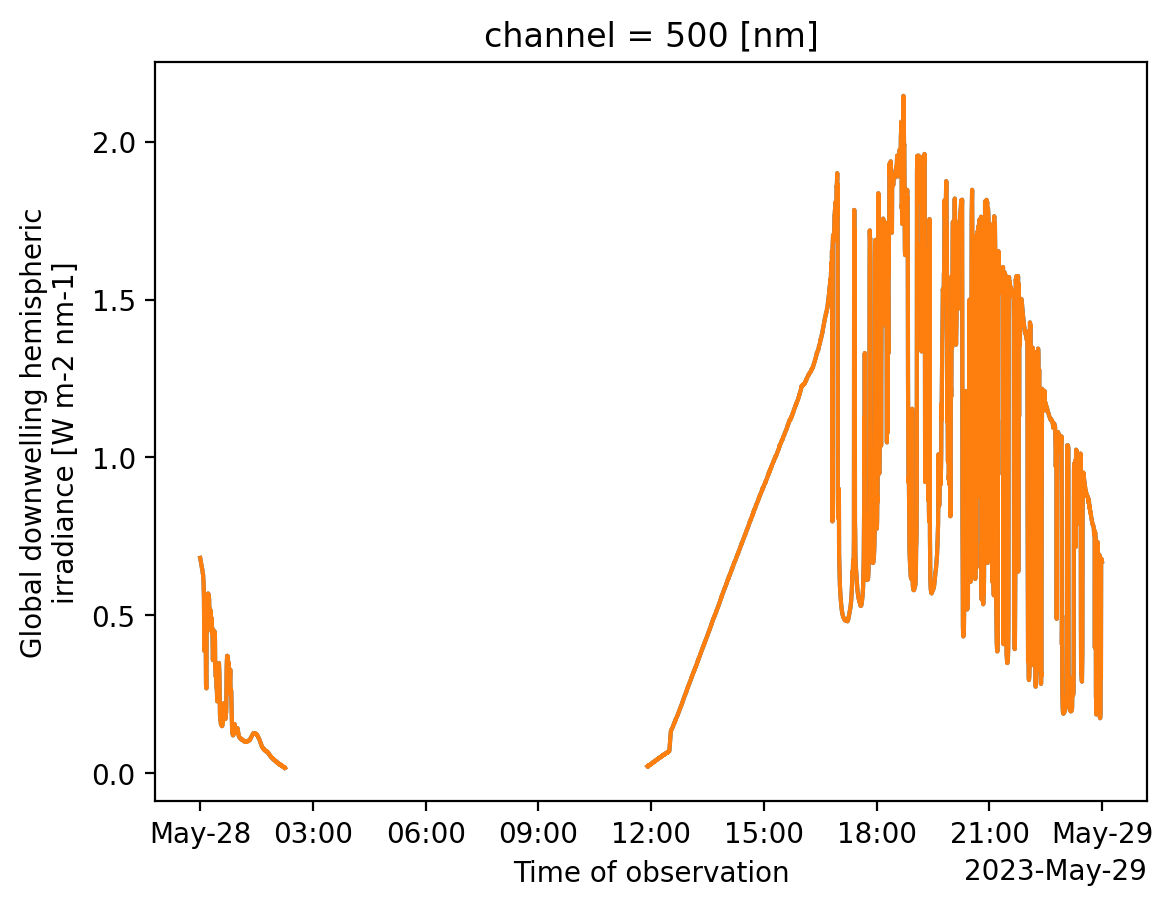

In [7]:
dssf.global_horizontal.sel(channel=550, method='nearest').plot()
dsal.downwelling_hemispheric_irradiance.sel(channel=550, method='nearest').plot()

## Use the top of the atmosphere solar constant

Once you correct for the variation in the Earth–Sun distance (which causes the ~±3.5% annual cycle in irradiance), the solar irradiance at the top of the atmosphere (the “solar constant”) is essentially constant:  

- **Mean value**: ~1361 W m⁻² (according to TIM/SORCE and other modern radiometers).  
- **Short-term variability**:  
  - On the timescale of minutes to hours: very small (≲0.01%), except during solar flares.  
  - Over the 11-year solar cycle: about ±0.05% to ±0.1% (~1–1.5 W m⁻²).  
- **Longer term trends**: No statistically significant secular trend has been measured over the past 40+ years of satellite monitoring; variations remain within ~1 W m⁻².  

👉 So, once Earth–Sun distance is accounted for, **the top-of-atmosphere solar irradiance is stable to better than 0.1%**, with only the solar cycle and transient events (like flares) causing small changes.  

Do you want me to also show how this translates into changes in absorbed solar energy by Earth (W m⁻² at the surface averaged globally)?


In [1]:
def read_splash_met_data(site):    
    year = pd.to_datetime(ro.dataset.datetime.values[0]).year
    p2f_met = f'/home/grad/sedlar/data/splash/surfrad/all_variables/{site}_concat_surfrad_all_variables{year}.nc'
    dsmet = xr.open_dataset(p2f_met)
    dsmet['time'] = pd.to_datetime(dsmet['time'], unit='d')
    pt_interp = dsmet[['temp','pressure']].interp(time = ro.dataset.datetime)
    return pt_interp


In [2]:
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf
import atmPy.radiation.retrievals.spectral_irradiance as atmspec

In [3]:

fn = '/nfs/grad/campaigns/splash/data_products/spectral_irradiances_downwelling/cbc/cal.2021/v0.2/cbc_specflux_20220625.nc'
# fn = '/nfs/grad/campaigns/splash/data_products/spectral_irradiances_downwelling/cbc/cal.sbs2021/v0.2/cbc_specflux_20230528.nc'
dssf = xr.open_dataset(fn)
dssf = dssf.rename({'channel_wavelength': 'channel_center'})
ro = atmspec.CombinedGlobalDiffuseDirect(dssf)

FileNotFoundError: [Errno 2] No such file or directory: '/nfs/grad/campaigns/splash/data_products/spectral_irradiances_downwelling/cbc/cal.2021/v0.2/cbc_specflux_20220625.nc'

In [521]:
fld = pl.Path('/nfs/grad/campaigns/splash/data_products/spectral_irradiances_downwelling/ckp/cal.fact/v0.2/')
fns = list(fld.glob('*'))
fns.sort()

In [522]:
i = 224 # 102: claer sky
# i += 1
fn = fns[i]
dssf = xr.open_dataset(fn)
scale = 1 + 0.3
dssf['direct_normal'] *= scale
dssf = dssf.drop_sel(channel= 1625) # for now as it is more complicated
# dssf = dssf.rename({'channel_wavelength': 'channel_center'})
ro = atmspec.CombinedGlobalDiffuseDirect(dssf)
# ro.plot_overview(show_alltime=False)
i

ro.direct_normal_irradiation.settings_calibration = 'toa_radiation'

ro.direct_normal_irradiation.transmission
# ro.direct_normal_irradiation._transmission *= scale

# ro.direct_normal_irradiation.transmission.plot.line(x = 'datetime')
# f,a = plt.subplots()
# ro.direct_normal_irradiation.od_total.plot.line(x='datetime', ax=a)
# a.set_ylim(0,1)

ro.direct_normal_irradiation.settings_metdata = lambda : read_splash_met_data('ckp')
# ro.direct_normal_irradiation.od_rayleigh.plot.line(x='datetime')
ro.direct_normal_irradiation.settings_ozone = 300 # DU
f,a = plt.subplots()
ro.direct_normal_irradiation.aod.plot.line(x='datetime', ax=a)
a.set_ylim(-0.1,0.4)

IndexError: list index out of range

## lets see if by scaling the sunspectrum a bit we can get better results

In [ ]:
fld = pl.Path('/nfs/grad/campaigns/splash/data_products/spectral_irradiances_downwelling/cbc/cal.2021/v0.2/')
fns = list(fld.glob('*'))
fns.sort()

In [177]:
reload(atmspec)
reload(atmsrf)

<module 'atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad' from '/home/grad/htelg/prog_dev/atm-py/atmPy/data_archives/NOAA_ESRL_GMD_GRAD/surfrad/surfrad.py'>

258


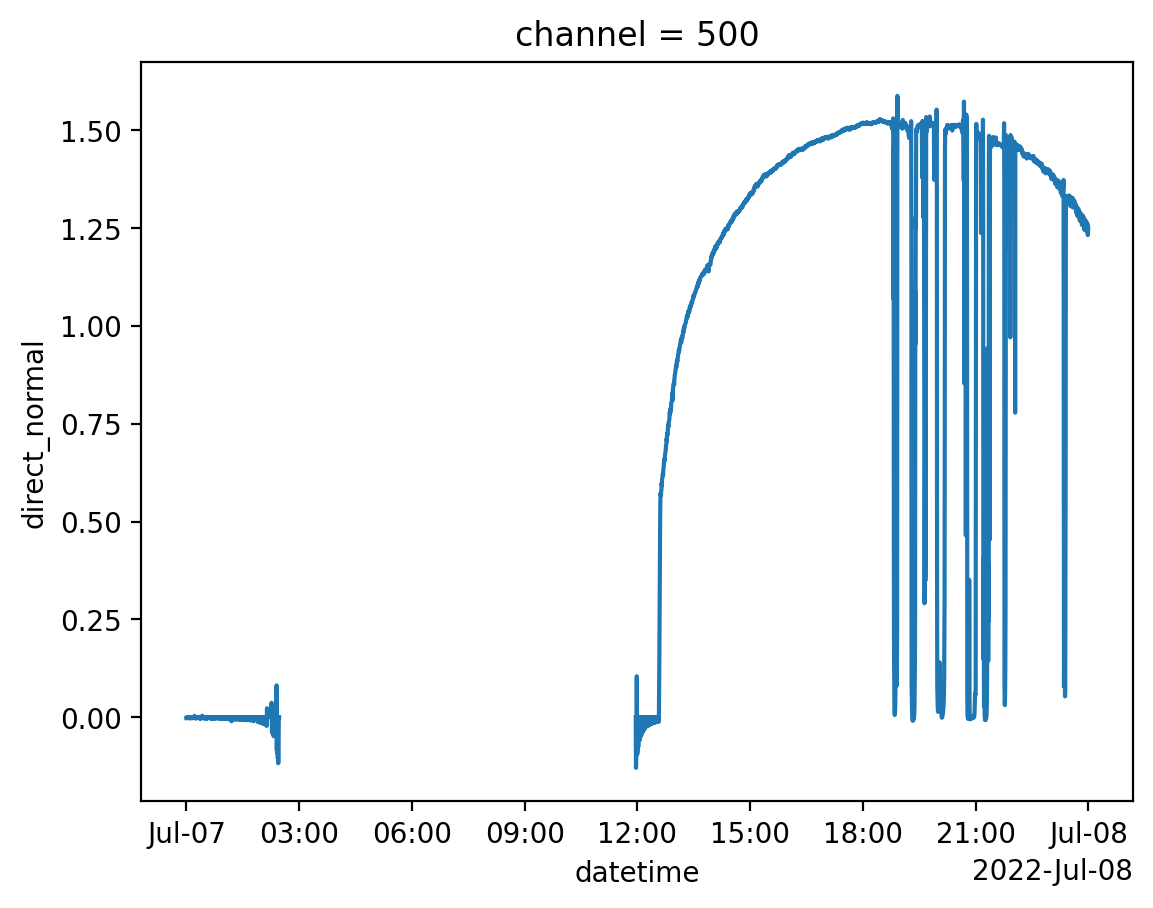

In [178]:
i = 258 # 102: claer sky, but winter
          # 242: clear sky, but summer
          # 258: clear most of the day, but some clouds in the afternoon

# i += 1 #
fn = fns[i]
dssf = xr.open_dataset(fn)
scale = 1 + 0.1
# dssf['direct_normal'] *= scale
dssf = dssf.drop_sel(channel= 1625) # for now as it is more complicated
# dssf = dssf.rename({'channel_wavelength': 'channel_center'})
ro = atmspec.CombinedGlobalDiffuseDirect(dssf)
# ro.plot_overview(show_alltime=False)
print(i)
rod = ro.direct_normal_irradiation
rod.dataset.direct_normal.sel(channel = 500).plot(x='datetime')

/home/grad/htelg/prog_dev/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


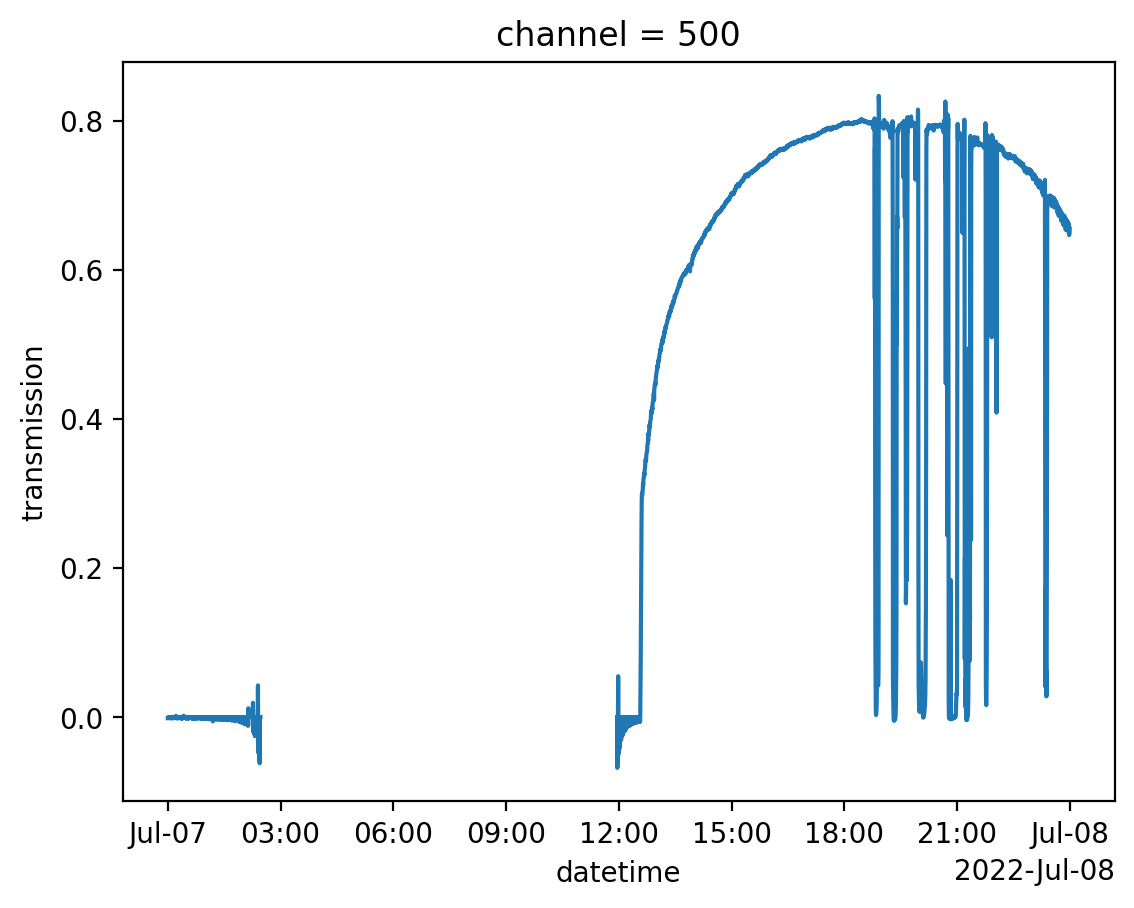

In [179]:
rod.settings_calibration = 'toa_radiation'
rod.transmission.sel(channel = 500).plot()

In [189]:
rod._solarspectrum = None
rod.solarspectrum
None

/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(0.0, 0.5)

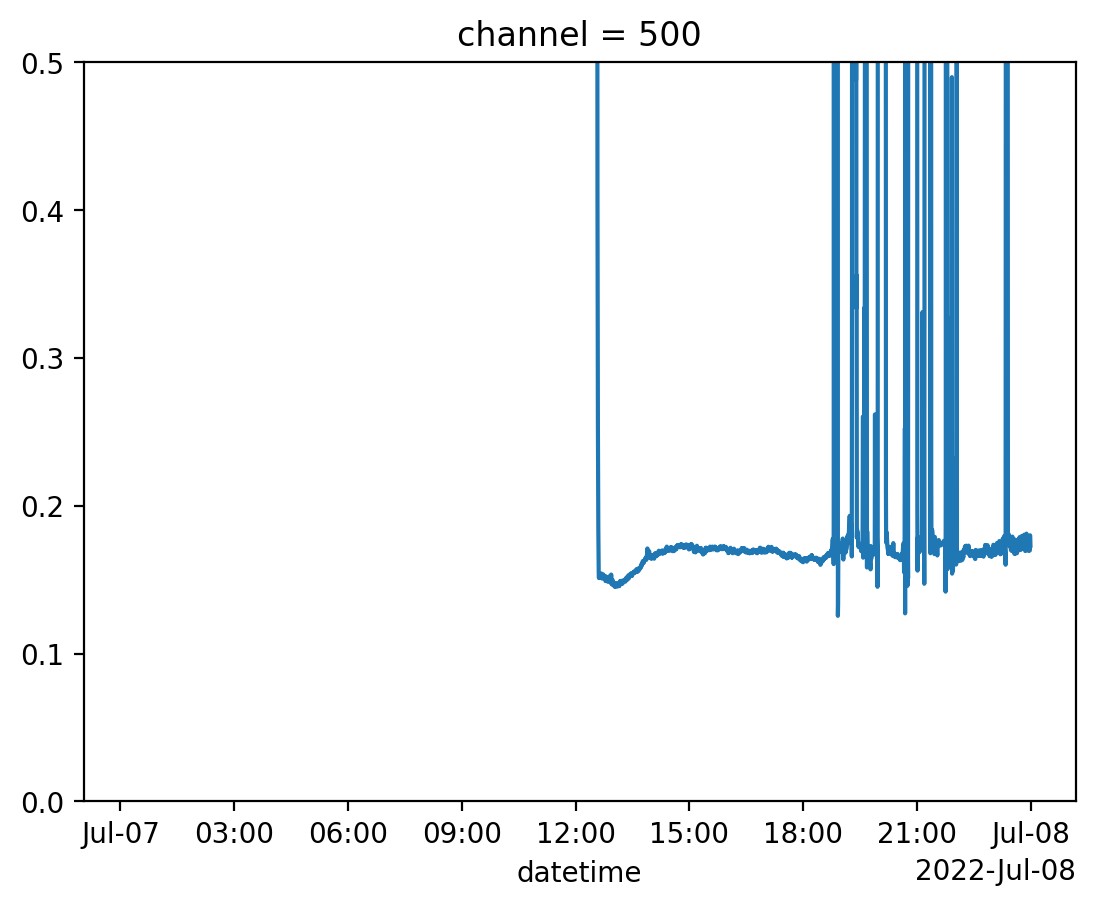

In [190]:
rod.settings_calibration = 'toa_radiation'
rod._transmission = None
rod._solarspectrum *=  0.95
# rod.transmission.sel(channel = 500).plot()
rod.od_total.sel(channel = 500).plot()
a = plt.gca()
a.set_ylim(0,0.5)

In [191]:
ro.direct_normal_irradiation.settings_ozone = 300 # DU
rod.settings_metdata = lambda : read_splash_met_data('cbc')

/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(0.035, 0.1)

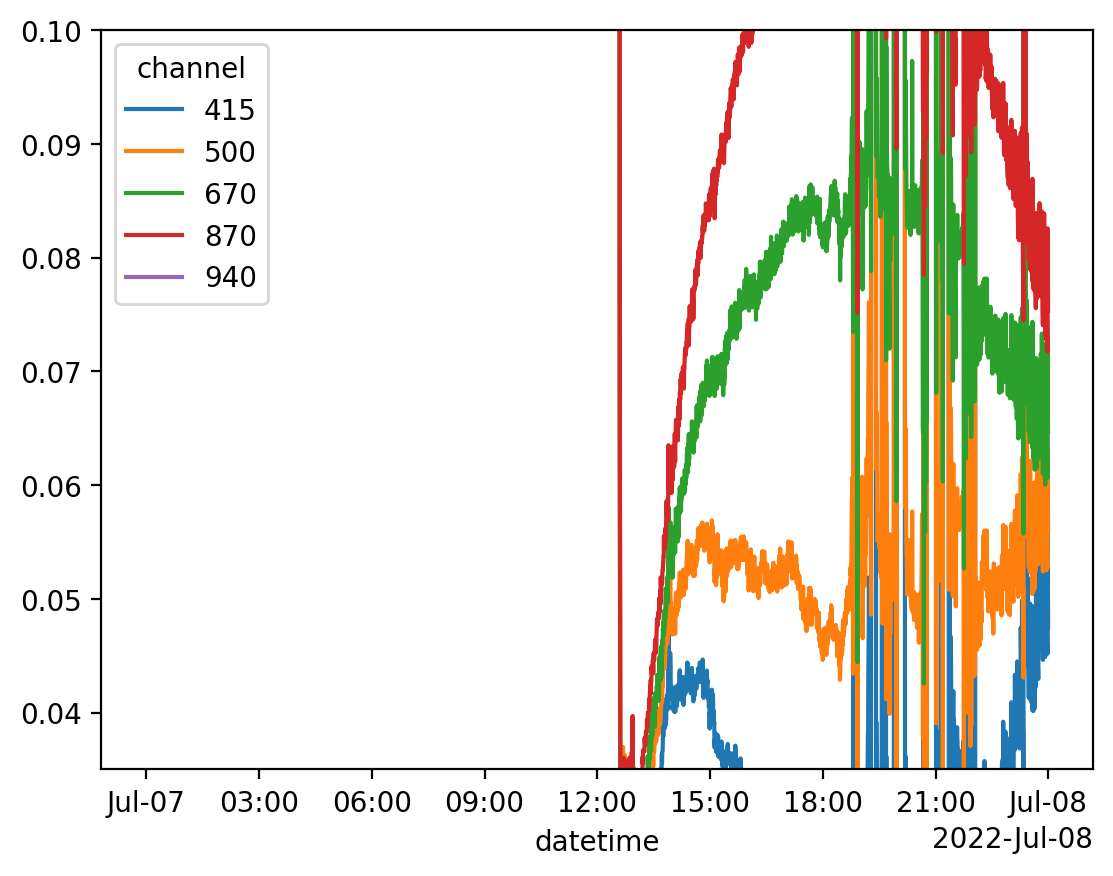

In [192]:
rod._aod = None
rod.aod.plot.line(x = 'datetime')
a = plt.gca()
a.set_ylim(0.035,0.06)
a.set_ylim(0.035,0.1)

In [103]:
rod.solarspectrum*100000

<xarray.Dataset> Size: 27kB
Dimensions:     (wavelength: 1697)
Coordinates:
  * wavelength  (wavelength) float64 14kB 119.5 120.5 121.5 ... 4e+05 1e+06
Data variables:
    irradiance  (wavelength) float64 14kB 18.49 167.7 ... 3.017e-05 1.01e-06

/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(0.0, 0.5)

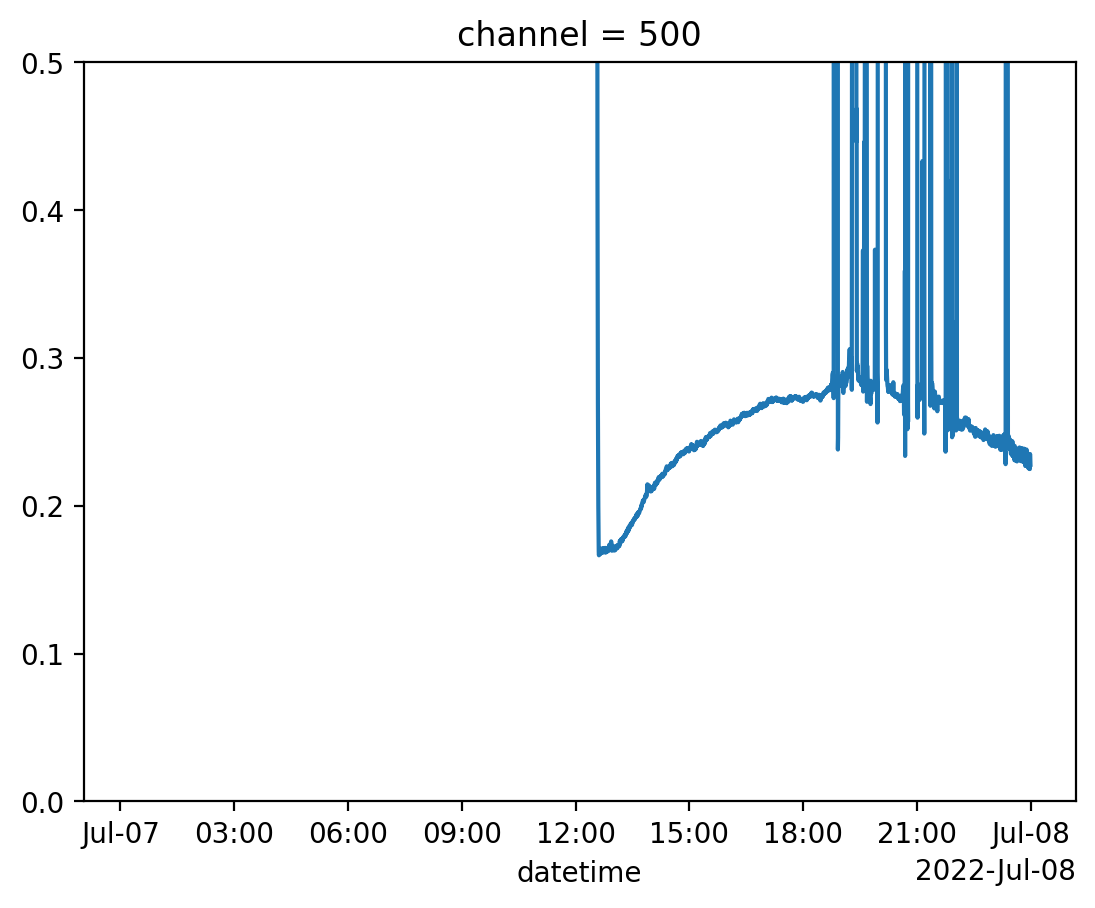

In [104]:
rod._solarspectrum *=  20
rod._transmission = None
rod.settings_calibration = 'toa_radiation'
# self._solarspctrum = None
f,a = plt.subplots()
rod.od_total.sel(channel = 500).plot(ax = a)
a.set_ylim(0,0.5)

/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(0.0, 0.5)

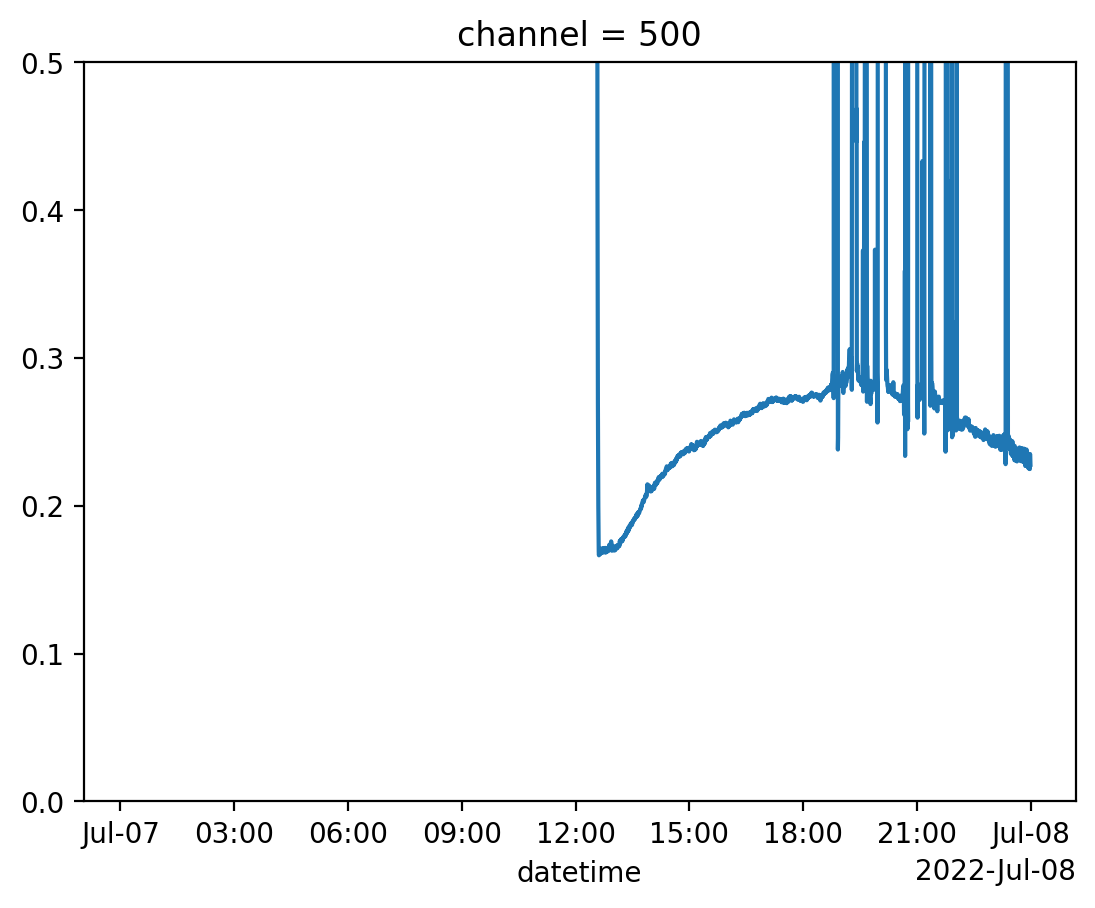

In [101]:
rod._solarspectrum *=  1.1
rod._transmission = None
rod.settings_calibration = 'toa_radiation'
# self._solarspctrum = None
f,a = plt.subplots()
rod.od_total.sel(channel = 500).plot(ax = a)
a.set_ylim(0,0.5)

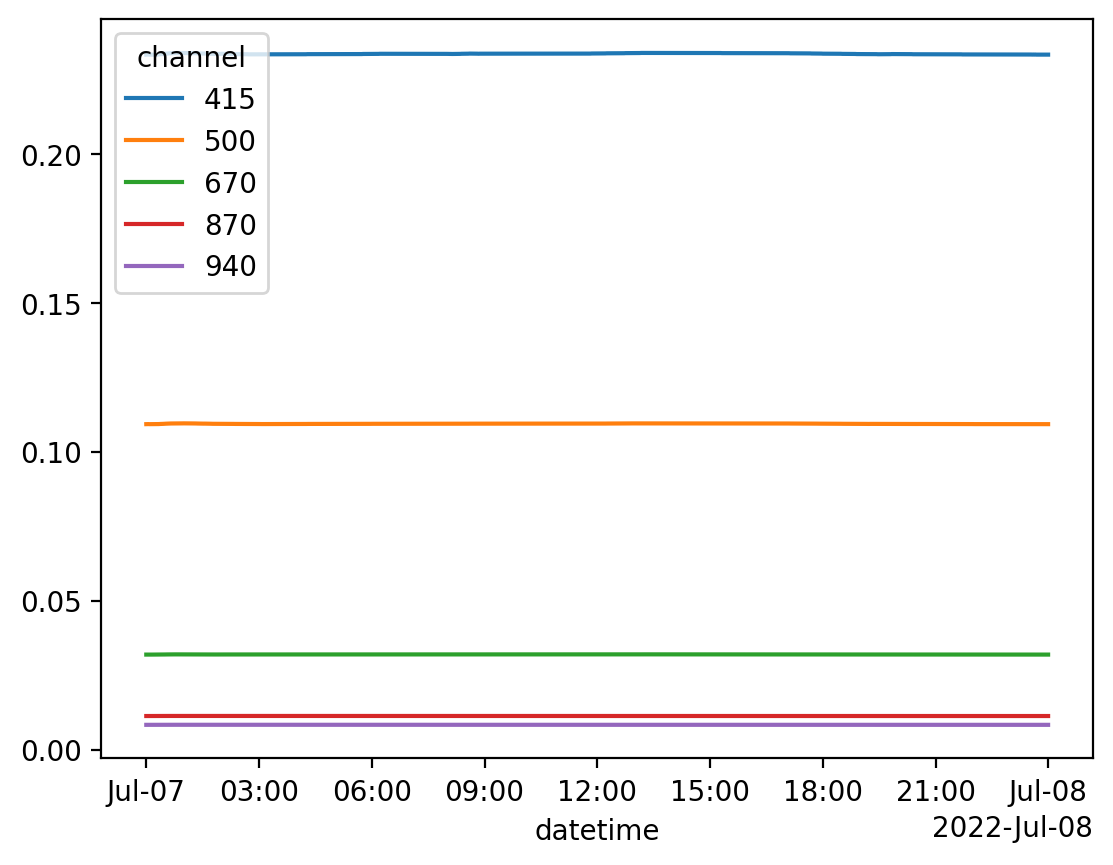

In [ ]:
# ro.direct_normal_irradiation._transmission *= scale

# ro.direct_normal_irradiation.transmission.plot.line(x = 'datetime')
# f,a = plt.subplots()
# ro.direct_normal_irradiation.od_total.plot.line(x='datetime', ax=a)
# a.set_ylim(0,1)

ro.direct_normal_irradiation.settings_metdata = lambda : read_splash_met_data('cbc')

ro.direct_normal_irradiation.od_rayleigh.plot.line(x='datetime',)

In [ ]:
ro.direct_normal_irradiation.sun_position

,elevation,azimuth,airmass,sun_earth_distance,ampm
datetime,,,,,
2022-07-07 00:00:00.000000000,0.484009,4.847332,2.149005,1.016696,b'pm'
2022-07-07 00:00:19.871999809,0.482895,4.848158,2.153569,1.016696,b'pm'
2022-07-07 00:00:39.744000250,0.481782,4.848985,2.158155,1.016696,b'pm'
2022-07-07 00:00:59.616000069,0.480668,4.849810,2.162762,1.016696,b'pm'
2022-07-07 00:01:20.352000172,0.479506,4.850672,2.167593,1.016696,b'pm'
...,...,...,...,...,...
2022-07-07 23:58:19.776000017,0.489124,4.840961,2.128326,1.016680,b'pm'
2022-07-07 23:58:39.647999827,0.488009,4.841790,2.132794,1.016680,b'pm'
2022-07-07 23:59:00.383999930,0.486846,4.842655,2.137479,1.016680,b'pm'


/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(0.0, 0.5)

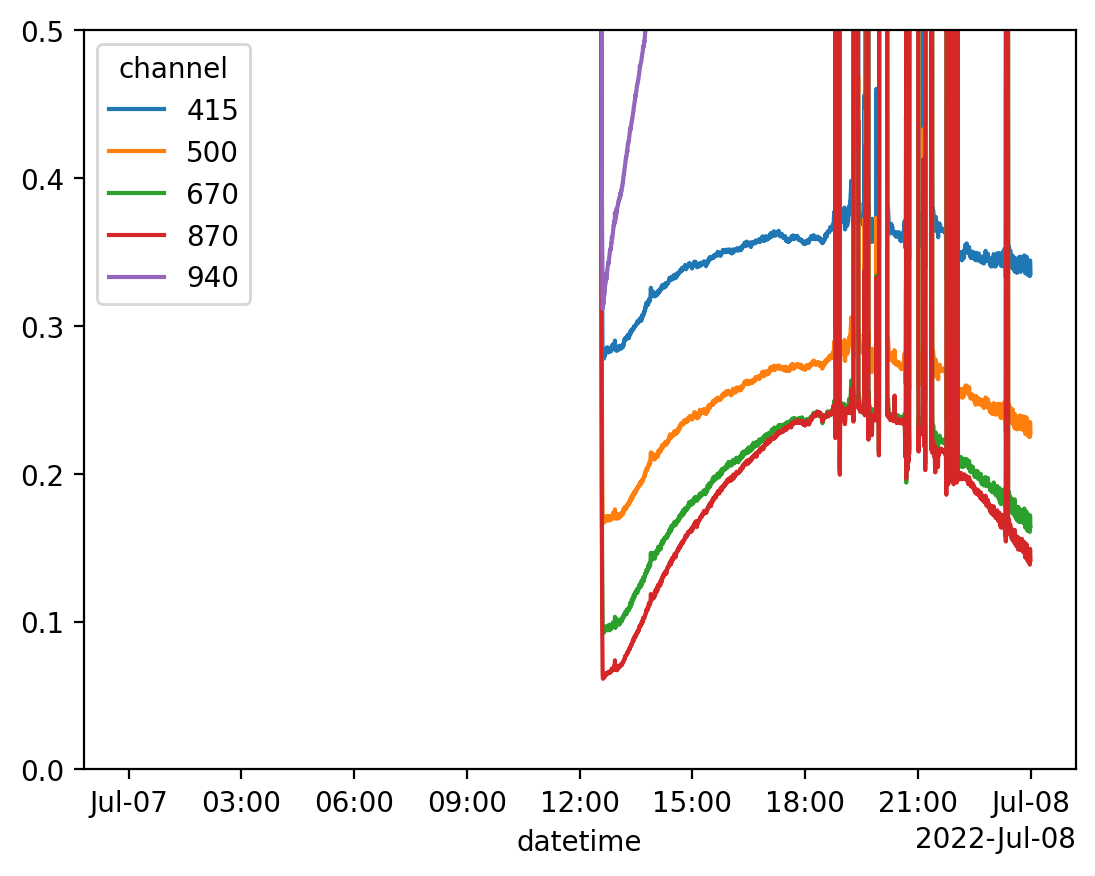

In [ ]:
f,a = plt.subplots()
ro.direct_normal_irradiation.od_total.plot.line(x='datetime',ax= a)
a.set_ylim(0,0.5)

(0.0, 0.4)

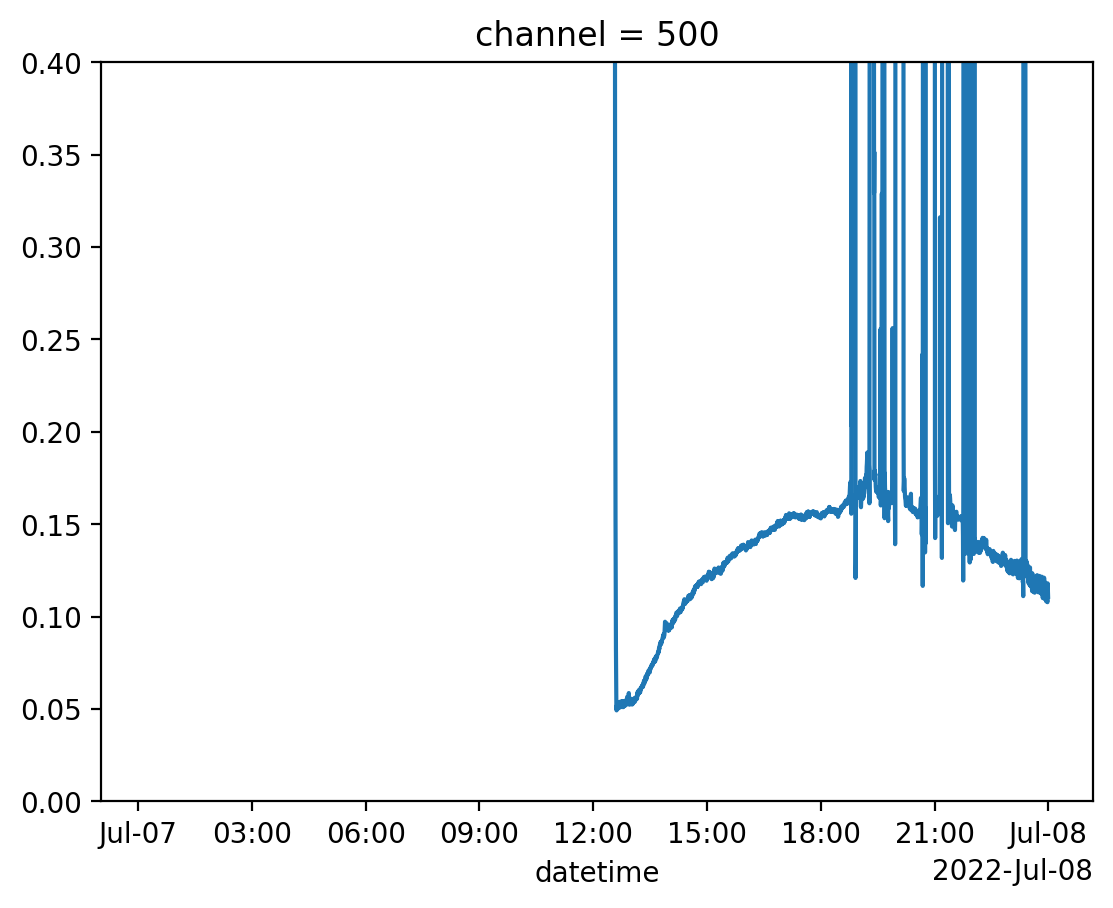

In [ ]:

# ro.direct_normal_irradiation.od_rayleigh.plot.line(x='datetime')
ro.direct_normal_irradiation.settings_ozone = 300 # DU
f,a = plt.subplots()
# ro.direct_normal_irradiation.aod.plot.line(x='datetime', ax=a)
ro.direct_normal_irradiation.aod.sel(channel = 500).plot(ax=a)
a.set_ylim(0,0.4)

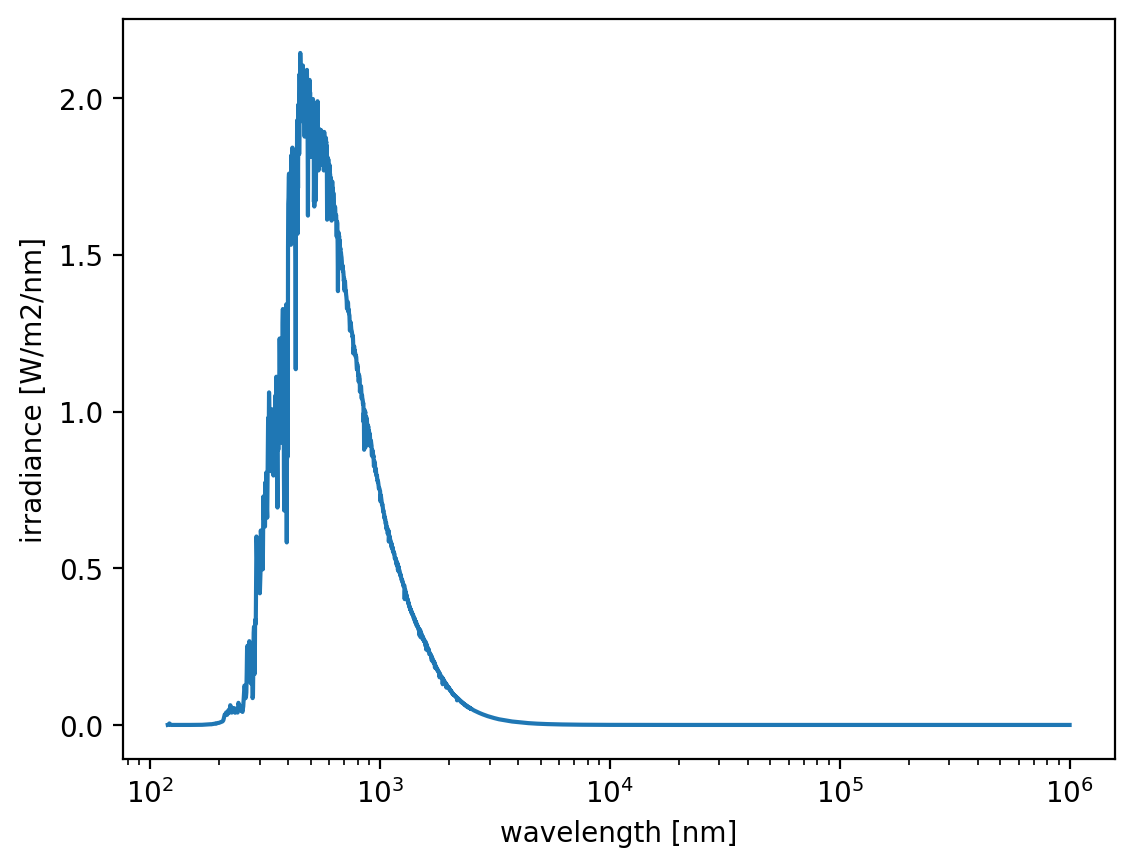

In [ ]:
f,a = plt.subplots()
ro.direct_normal_irradiation.solarspectrum.irradiance.plot(ax = a)
a.set_xscale('log')

In [ ]:
fld = pl.Path('/nfs/grad/campaigns/splash/data_products/spectral_irradiances_downwelling/cbc/cal.fact/v0.2/')
fns = list(fld.glob('*'))
fns.sort()

/home/grad/htelg/prog_dev/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/grad/htelg/prog_dev/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1116: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.raw_data.dims[d] for d in ['datetime', 'channel'])),


(0.0, 0.4)

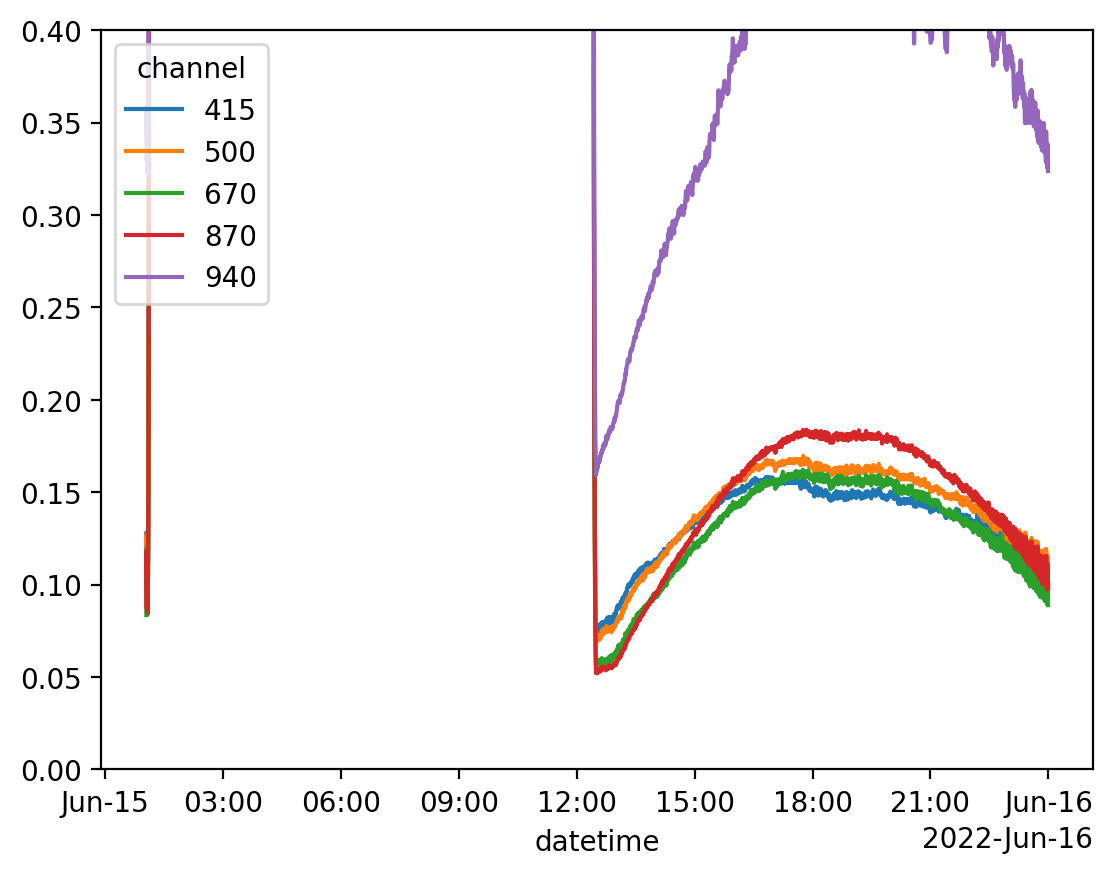

In [ ]:
i = 242 # 102: claer sky, but winter
          # 242: clear sky, but summer
# i += 1 #
fn = fns[i]
dssf = xr.open_dataset(fn)
scale = 1 + 0.1
# dssf['direct_normal'] *= scale
dssf = dssf.drop_sel(channel= 1625) # for now as it is more complicated
# dssf = dssf.rename({'channel_wavelength': 'channel_center'})
ro = atmspec.CombinedGlobalDiffuseDirect(dssf)
# ro.plot_overview(show_alltime=False)
i


ro.direct_normal_irradiation.settings_calibration = 'toa_radiation'

ro.direct_normal_irradiation.transmission
# ro.direct_normal_irradiation._transmission *= scale

# ro.direct_normal_irradiation.transmission.plot.line(x = 'datetime')
# f,a = plt.subplots()
# ro.direct_normal_irradiation.od_total.plot.line(x='datetime', ax=a)
# a.set_ylim(0,1)

ro.direct_normal_irradiation.settings_metdata = lambda : read_splash_met_data('cbc')
# ro.direct_normal_irradiation.od_rayleigh.plot.line(x='datetime')
ro.direct_normal_irradiation.settings_ozone = 300 # DU
f,a = plt.subplots()
ro.direct_normal_irradiation.aod.plot.line(x='datetime', ax=a)
a.set_ylim(0,0.4)

In [ ]:
ro.diffuse_horizontal_irradiation.tp

AttributeError: 'DiffuseHorizontalIrradiation' object has no attribute 'tp'

## This does not look that good, but why?

In [57]:
reload(atmspec)
reload(atmsrf)

<module 'atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad' from '/home/grad/htelg/prog_dev/atm-py/atmPy/data_archives/NOAA_ESRL_GMD_GRAD/surfrad/surfrad.py'>

In [58]:
fld = pl.Path('/nfs/grad/campaigns/splash/data_products/spectral_irradiances_downwelling/cbc/cal.2021/v0.2/')
fns = list(fld.glob('*'))
fns.sort()

258


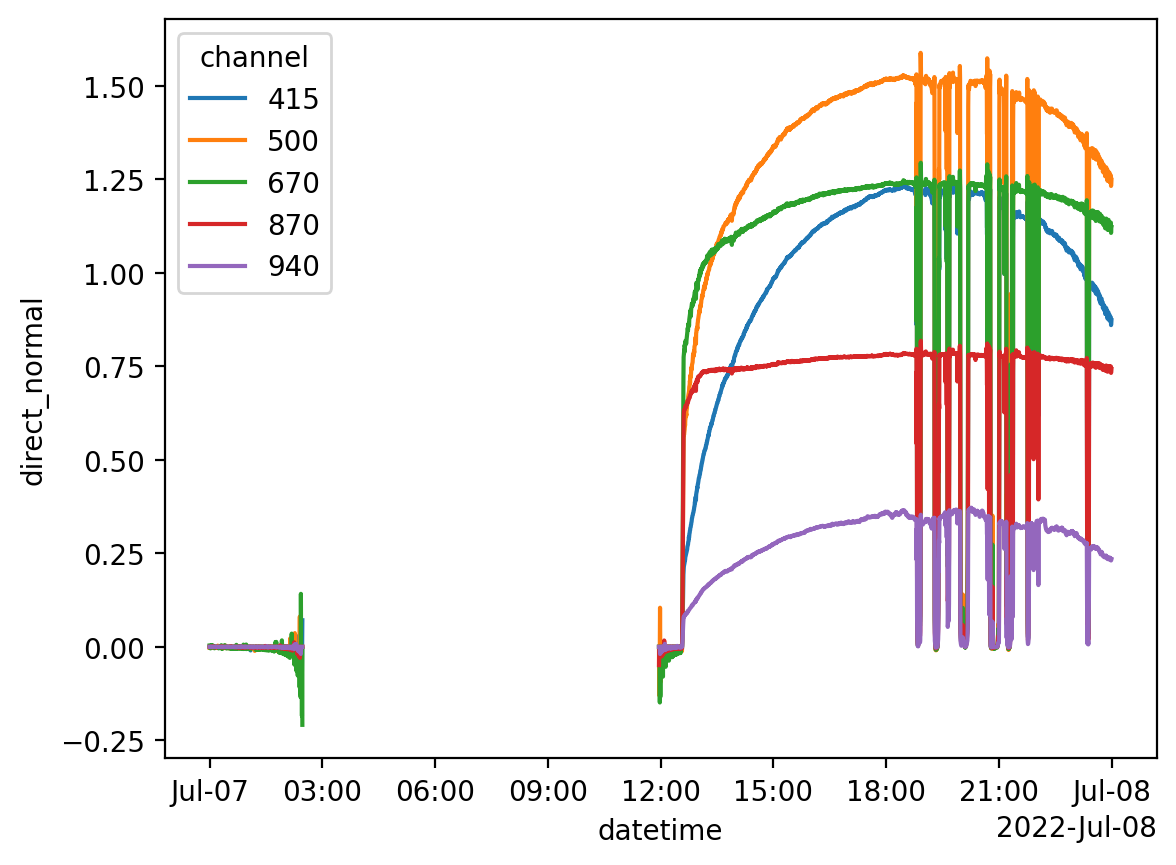

In [ ]:
# i = 242 # 102: claer sky, but winter
          # 242: clear sky, but summer
          # 258: clear most of the day, but some clouds in the afternoon

i += 1 #
fn = fns[i]
dssf = xr.open_dataset(fn)
scale = 1 + 0.1
# dssf['direct_normal'] *= scale
dssf = dssf.drop_sel(channel= 1625) # for now as it is more complicated
# dssf = dssf.rename({'channel_wavelength': 'channel_center'})
ro = atmspec.CombinedGlobalDiffuseDirect(dssf)
# ro.plot_overview(show_alltime=False)
print(i)
ro.direct_normal_irradiation.dataset.direct_normal.plot.line(x='datetime')

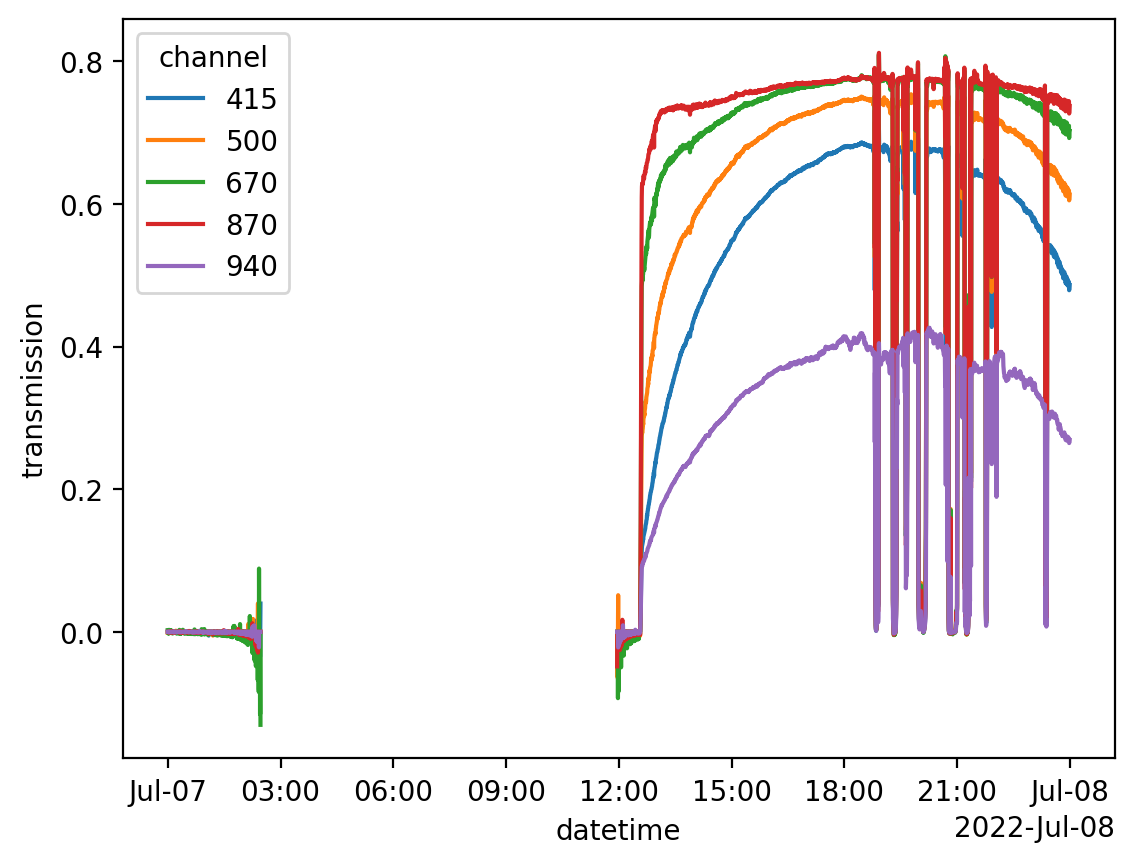

In [73]:
ro.direct_normal_irradiation.settings_calibration = 'toa_radiation'
ro.direct_normal_irradiation.transmission.plot.line(x = 'datetime')

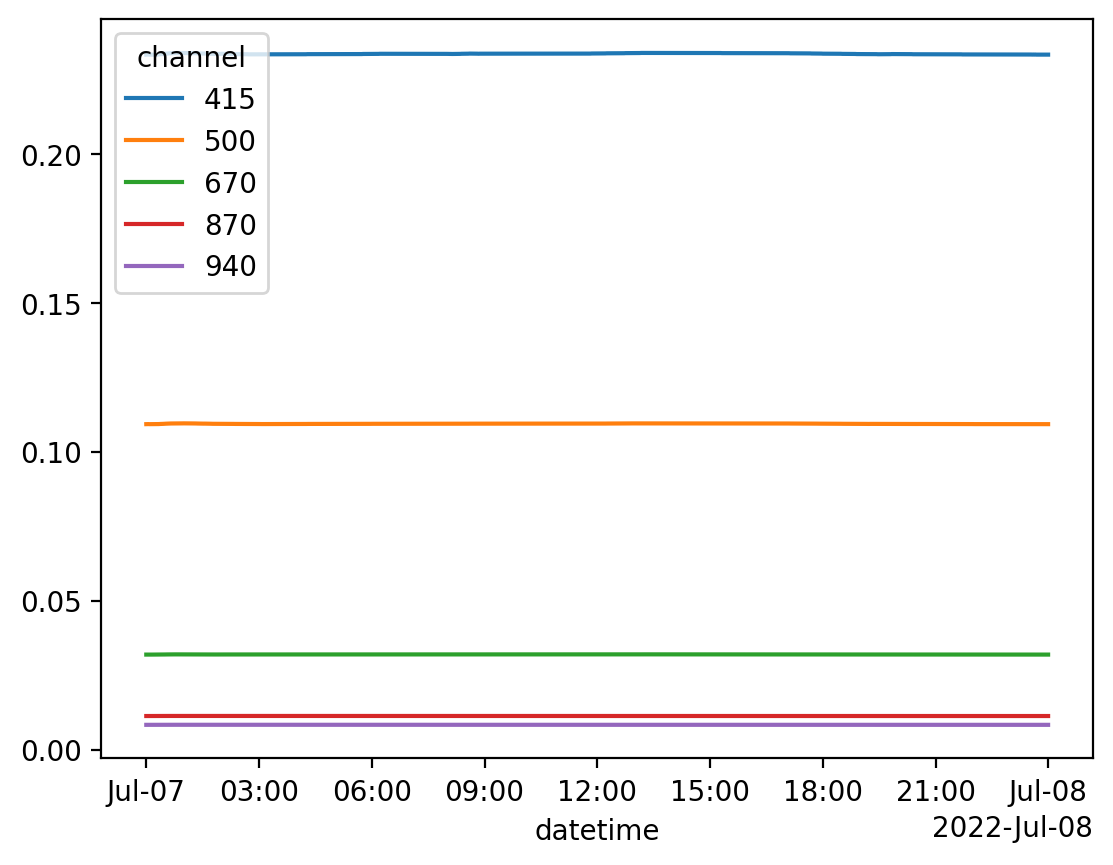

In [74]:
# ro.direct_normal_irradiation._transmission *= scale

# ro.direct_normal_irradiation.transmission.plot.line(x = 'datetime')
# f,a = plt.subplots()
# ro.direct_normal_irradiation.od_total.plot.line(x='datetime', ax=a)
# a.set_ylim(0,1)

ro.direct_normal_irradiation.settings_metdata = lambda : read_splash_met_data('cbc')

ro.direct_normal_irradiation.od_rayleigh.plot.line(x='datetime',)

In [75]:
ro.direct_normal_irradiation.sun_position

,elevation,azimuth,airmass,sun_earth_distance,ampm
datetime,,,,,
2022-07-07 00:00:00.000000000,0.484009,4.847332,2.149005,1.016696,b'pm'
2022-07-07 00:00:19.871999809,0.482895,4.848158,2.153569,1.016696,b'pm'
2022-07-07 00:00:39.744000250,0.481782,4.848985,2.158155,1.016696,b'pm'
2022-07-07 00:00:59.616000069,0.480668,4.849810,2.162762,1.016696,b'pm'
2022-07-07 00:01:20.352000172,0.479506,4.850672,2.167593,1.016696,b'pm'
...,...,...,...,...,...
2022-07-07 23:58:19.776000017,0.489124,4.840961,2.128326,1.016680,b'pm'
2022-07-07 23:58:39.647999827,0.488009,4.841790,2.132794,1.016680,b'pm'
2022-07-07 23:59:00.383999930,0.486846,4.842655,2.137479,1.016680,b'pm'


/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(0.0, 0.5)

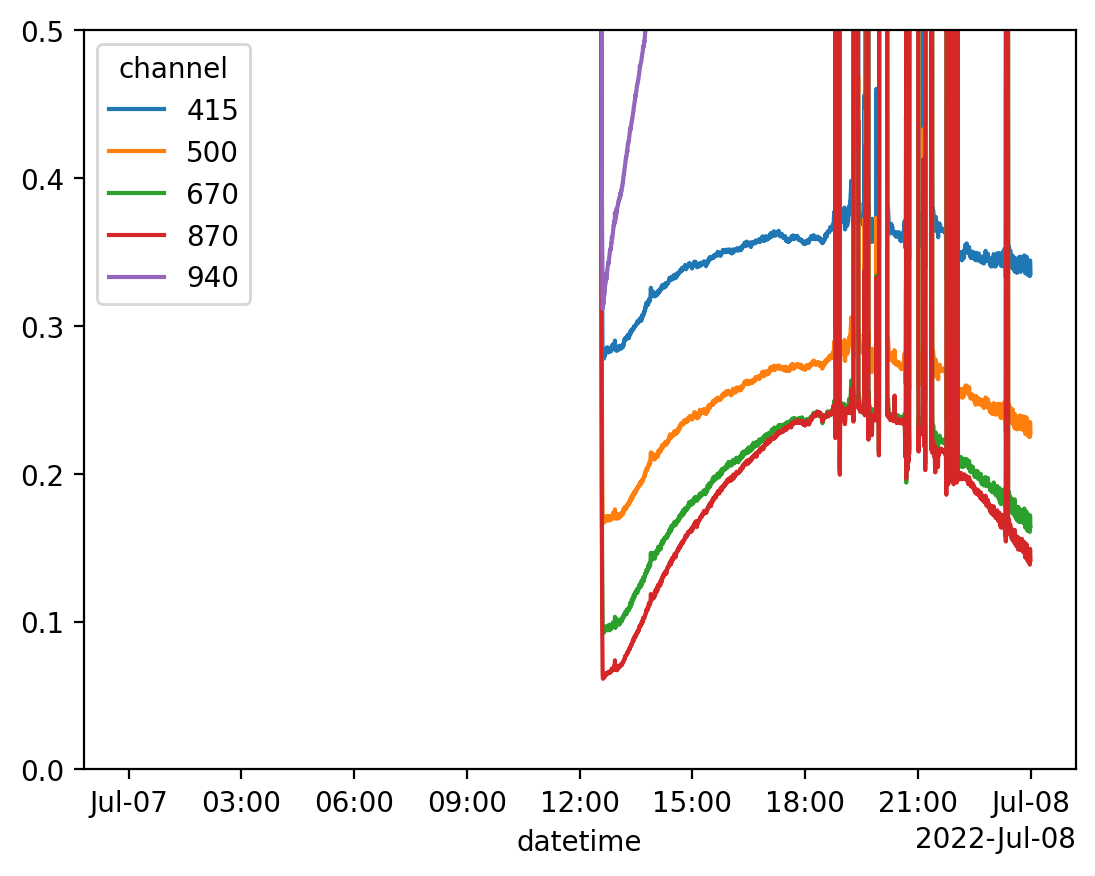

In [76]:
f,a = plt.subplots()
ro.direct_normal_irradiation.od_total.plot.line(x='datetime',ax= a)
a.set_ylim(0,0.5)

(0.0, 0.4)

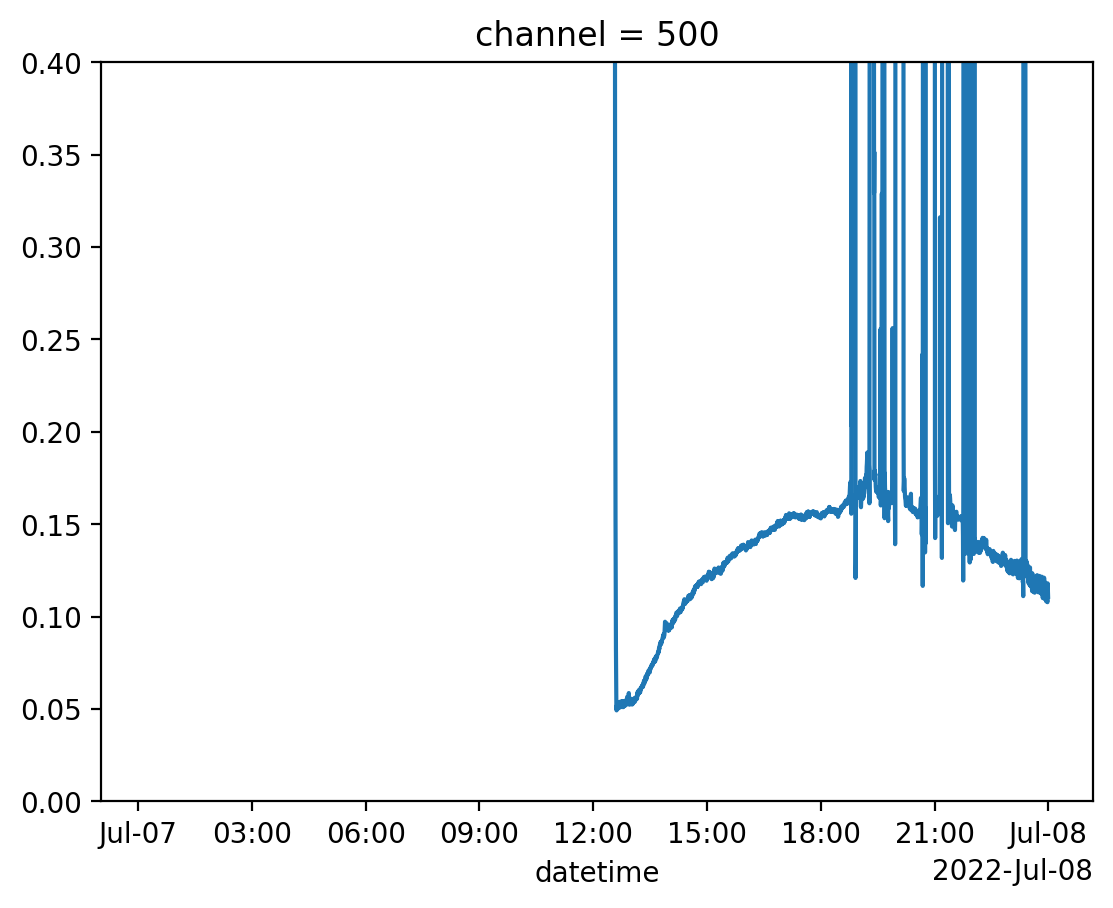

In [77]:

# ro.direct_normal_irradiation.od_rayleigh.plot.line(x='datetime')
ro.direct_normal_irradiation.settings_ozone = 300 # DU
f,a = plt.subplots()
# ro.direct_normal_irradiation.aod.plot.line(x='datetime', ax=a)
ro.direct_normal_irradiation.aod.sel(channel = 500).plot(ax=a)
a.set_ylim(0,0.4)

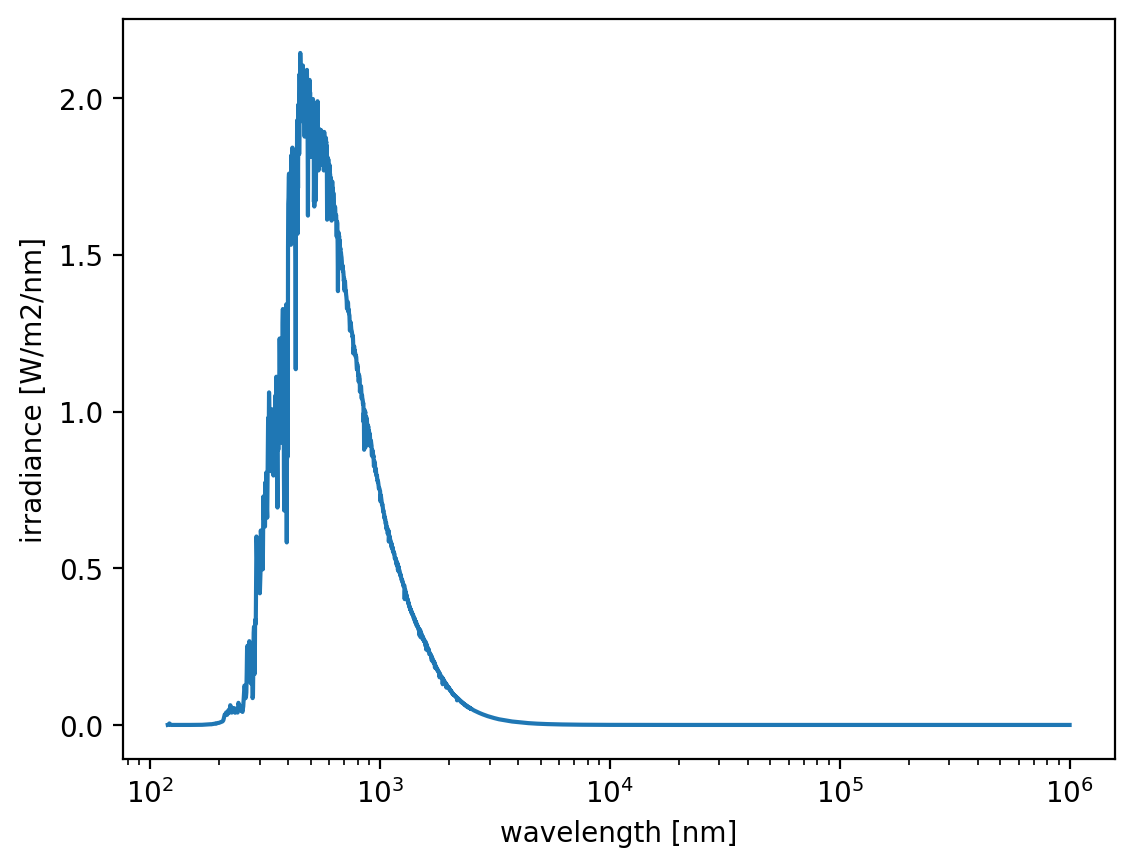

In [18]:
f,a = plt.subplots()
ro.direct_normal_irradiation.solarspectrum.irradiance.plot(ax = a)
a.set_xscale('log')

In [ ]:
fld = pl.Path('/nfs/grad/campaigns/splash/data_products/spectral_irradiances_downwelling/cbc/cal.fact/v0.2/')
fns = list(fld.glob('*'))
fns.sort()

/home/grad/htelg/prog_dev/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/export2/htelg/programs/miniconda3/envs/py12t2/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/grad/htelg/prog_dev/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1116: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.raw_data.dims[d] for d in ['datetime', 'channel'])),


(0.0, 0.4)

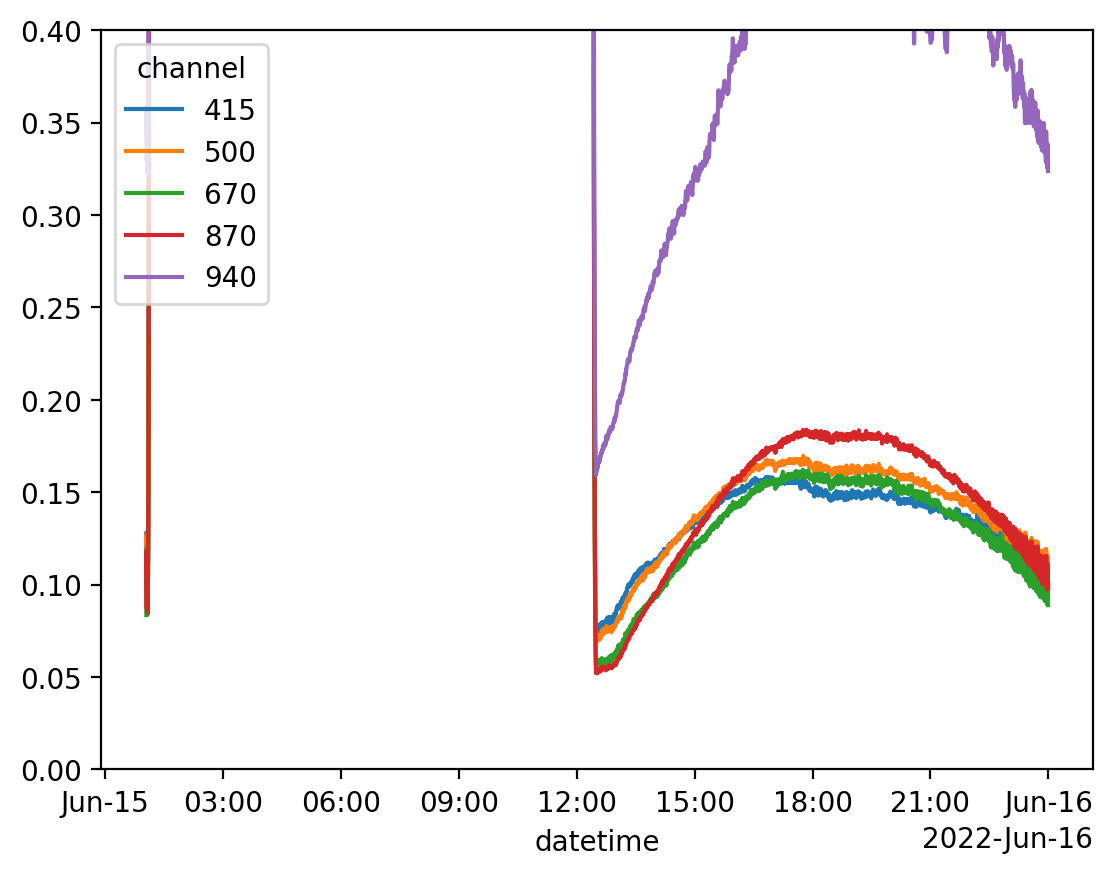

In [ ]:
i = 242 # 102: claer sky, but winter
          # 242: clear sky, but summer
# i += 1 #
fn = fns[i]
dssf = xr.open_dataset(fn)
scale = 1 + 0.1
# dssf['direct_normal'] *= scale
dssf = dssf.drop_sel(channel= 1625) # for now as it is more complicated
# dssf = dssf.rename({'channel_wavelength': 'channel_center'})
ro = atmspec.CombinedGlobalDiffuseDirect(dssf)
# ro.plot_overview(show_alltime=False)
i


ro.direct_normal_irradiation.settings_calibration = 'toa_radiation'

ro.direct_normal_irradiation.transmission
# ro.direct_normal_irradiation._transmission *= scale

# ro.direct_normal_irradiation.transmission.plot.line(x = 'datetime')
# f,a = plt.subplots()
# ro.direct_normal_irradiation.od_total.plot.line(x='datetime', ax=a)
# a.set_ylim(0,1)

ro.direct_normal_irradiation.settings_metdata = lambda : read_splash_met_data('cbc')
# ro.direct_normal_irradiation.od_rayleigh.plot.line(x='datetime')
ro.direct_normal_irradiation.settings_ozone = 300 # DU
f,a = plt.subplots()
ro.direct_normal_irradiation.aod.plot.line(x='datetime', ax=a)
a.set_ylim(0,0.4)

In [434]:
ro.diffuse_horizontal_irradiation.tp

AttributeError: 'DiffuseHorizontalIrradiation' object has no attribute 'tp'

# Apply cloud screening

In [ ]:
atmsrf.open_path('/nfs/grad/Inst/')